<a href="https://colab.research.google.com/github/Pritush09/DeepLearning-Pytorch/blob/master/02_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Creating the data 

In [3]:
data = make_moons(n_samples=1000,random_state=42)

In [4]:
X = data[0]
y = data[1]

In [5]:
# converting the data into the torch datetypes
X = torch.from_numpy(X).to(torch.float)
y = torch.from_numpy(y).to(torch.long)

In [6]:
X.dtype , y.dtype

(torch.float32, torch.int64)

In [7]:
print(X[0] , y[0])
print(X[1] , y[1])

tensor([0.0087, 0.3682]) tensor(1)
tensor([ 0.9214, -0.4969]) tensor(1)


In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [9]:
y.unique()

tensor([0, 1])

In [10]:
#X[:][y==1]
import pandas as pd
import seaborn as sns

# Visualising

In [11]:
df = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1],'y':y})

In [12]:
df

,X0,X1,y
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0
...,...,...,...
995,0.785463,0.618909,0
996,-0.128705,0.991683,0
997,1.640910,-0.267616,1
998,-0.919916,0.392115,0


In [13]:
df.y = df.y.astype(int)

<AxesSubplot:xlabel='X0', ylabel='X1'>

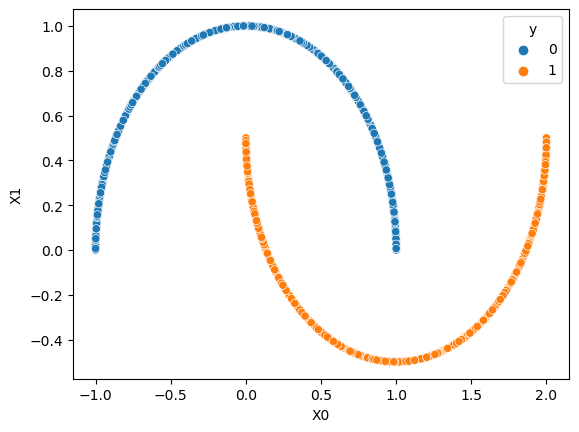

In [14]:
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green tris
sns.scatterplot(data=df , x='X0',y='X1',hue='y')

# Model building

In [15]:
# no need to write the device agnostic code as i have downloaded it for cpu only 

In [29]:
class Make_moon(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
                            nn.Linear(in_features=2,out_features=10),
                            nn.ReLU(),
                            nn.Linear(in_features=10,out_features=10),
                            nn.ReLU(),
                            nn.Linear(in_features=10,out_features=2),
                        )
    def forward(self,x):
        return self.layer(x)
    

In [17]:
torch.manual_seed(42)
model = Make_moon()

In [18]:
# choosing the optimizer and the loss function
## Error using BCELoss() "binary_cross_entropy" not implemented for 'Long'
loss_fn = nn.CrossEntropyLoss() 

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [19]:
model.eval()
with torch.inference_mode():
    y_logit = model(X_train)
y_logit

tensor([[0.2092, 0.0169],
        [0.2180, 0.0315],
        [0.2264, 0.0410],
        ...,
        [0.2219, 0.0375],
        [0.2371, 0.0305],
        [0.2090, 0.0150]])

In [20]:
torch.sigmoid(y_logit).argmax(dim=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
y_logit.shape , y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [22]:
torch.manual_seed(42)

epochs = 1000

for epoch in  range(epochs):
    model.train()
    
    # forward pass
    y_logits = model(X_train)
    y_pred = torch.sigmoid(y_logits).argmax(dim=1)
    
    ## Loss
    loss = loss_fn(y_logits,y_train)
    
    ## Optimizer 0 grad
    optimizer.zero_grad()
    
    #Backward Propagation
    loss.backward()
    
    ## Optimizer step
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.sigmoid(test_logits).argmax(dim=1)
        
        test_loss = loss_fn(test_logits,y_test)
        
    if epoch % 100==0:
        print(f"Epoch : {epoch} |  train_loss : {loss:.10f}  |  test_loss : {test_loss:.10f}")

Epoch : 0 |  train_loss : 0.7003323436  |  test_loss : 0.6948137879
Epoch : 100 |  train_loss : 0.0217295177  |  test_loss : 0.0190522727
Epoch : 200 |  train_loss : 0.0019575944  |  test_loss : 0.0017868646
Epoch : 300 |  train_loss : 0.0007785332  |  test_loss : 0.0007200113
Epoch : 400 |  train_loss : 0.0004211184  |  test_loss : 0.0003898258
Epoch : 500 |  train_loss : 0.0002640249  |  test_loss : 0.0002428311
Epoch : 600 |  train_loss : 0.0001800995  |  test_loss : 0.0001650809
Epoch : 700 |  train_loss : 0.0001296931  |  test_loss : 0.0001190656
Epoch : 800 |  train_loss : 0.0000972642  |  test_loss : 0.0000893116
Epoch : 900 |  train_loss : 0.0000716599  |  test_loss : 0.0000653067


In [23]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)
torch.sigmoid(y_pred).argmax(dim=1)

tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 1])

In [26]:
X.shape , y.shape

((1000, 2), (1000,))

In [27]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [40]:
import numpy as np

In [59]:
X_test.shape , y_train.shape , X_train.shape , y_test.shape 

(torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([800, 2]),
 torch.Size([200]))

In [72]:
# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    X, y = X, y

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))
    print(f"xx {xx.ravel().shape} , yy {yy.ravel().shape}")
    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()
    print(f"x {X_to_pred_on.shape}")
    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.sigmoid(y_logits). # binary
    
    print(f"xx {xx.shape} yy {yy.shape} y_pread {y_pred.shape}")

    # Reshape preds and plot
    y_pred = torch.reshape(y_pred,(101,101)).detach().numpy()
    print(f"xx {xx.shape} yy {yy.shape} y_pread {y_pred.shape}")
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

xx (10201,) , yy (10201,)
x torch.Size([10201, 2])
xx (101, 101) yy (101, 101) y_pread torch.Size([10201, 2])


RuntimeError: shape '[101, 101]' is invalid for input of size 20402

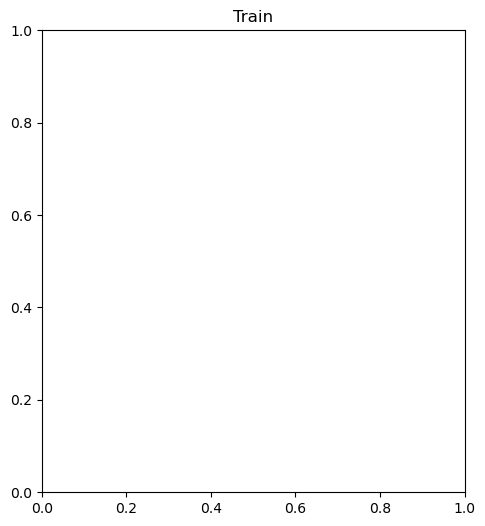

In [73]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
     